#### Importación de bibliotecas

In [8]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de la base de datos

In [9]:
df = pd.read_csv("../Data/tourist_accommodation_clean.csv")
pd.set_option('display.max_columns', None)
df.head()

,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,11964,A ROOM WITH A VIEW,45553,Centro,Desconocido,Private room,2,2.0,1.0,2,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,malaga,2018-07-31
1,21853,Bright and airy room,83531,C�rmenes,Latina,Private room,1,1.0,1.0,1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaN,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,4,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaN,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,2,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaN,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,153805,Quart,Desconocido,Private room,5,1.0,2.0,5,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,True,0,19,49,312,36,2011-08-07,2018-08-08,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,39.0,girona,2019-02-19


In [10]:
registros_totales = len(df)
print(f'Total de registros de la DB: {registros_totales}')

Total de registros de la DB: 10000


##### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
bathrooms                       1.59                 0.99     0.0       1.0      1.0       2.0     13.0
bedrooms                        1.93                 1.37     0.0       1.0      2.0       3.0     50.0
beds                            4.27                 2.58     1.0       2.0      4.0       6.0     29.0
price                        1017.33               963.37    60.0     450.0    750.0    1200.0  28571.0
minimum_nights                  4.95                17.73     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.77               498.37     1.0      62.0   1125.0    1125.0   1125.0
availability_30                13.01                11.84     0.0       0.0     11.0      26.0     30.0
availability_60            

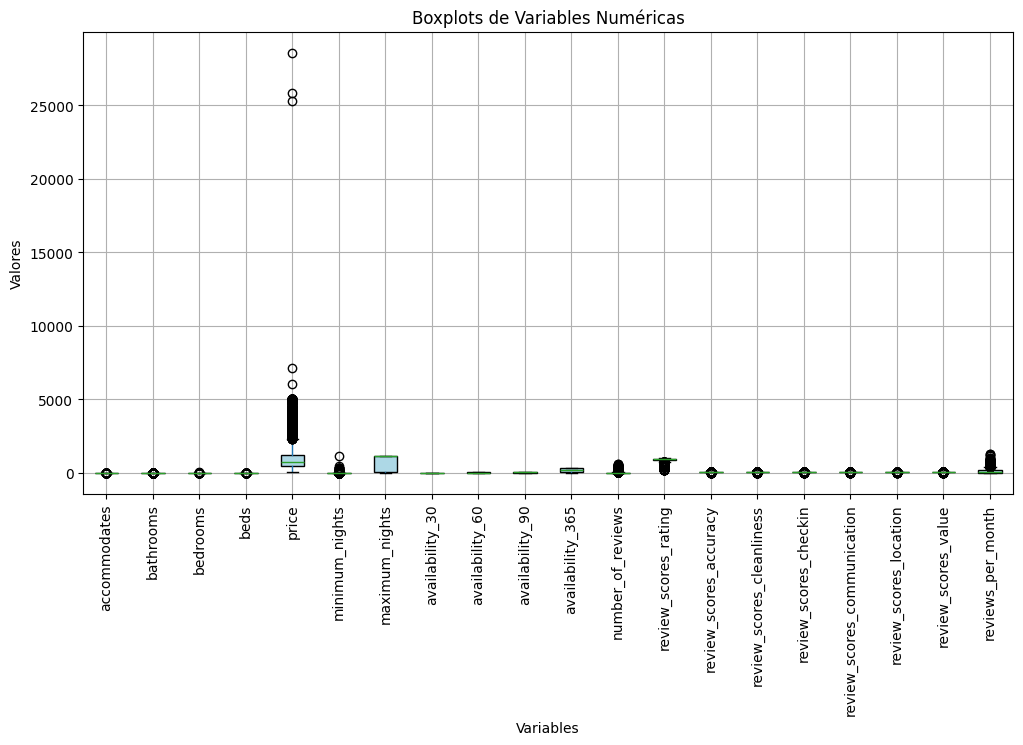

In [11]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

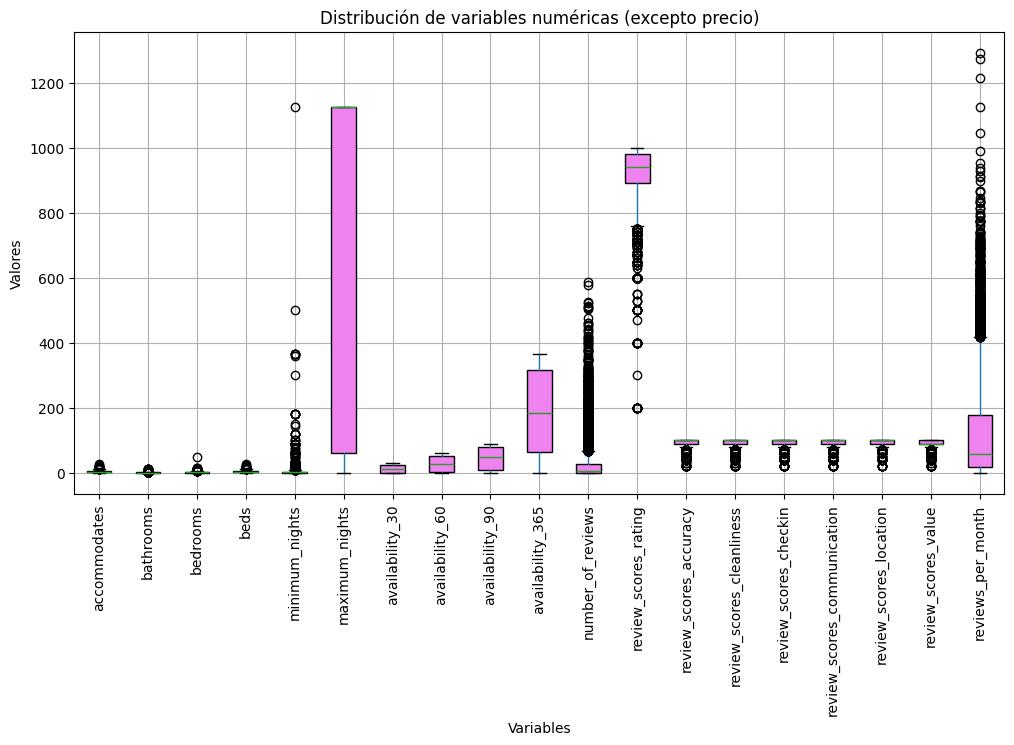

In [12]:
# nuevo gráfico para poder ver mejor las distribuciones

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

### Limpieza de duplicados

## EDA CX

In [13]:
# valores únicos en cada columna
df.apply(pd.Series.nunique)

apartment_id                   9650
name                           9668
host_id                        7269
neighbourhood_name              521
neighbourhood_district           62
room_type                         4
accommodates                     21
bathrooms                        14
bedrooms                         15
beds                             21
amenities_list                 9705
price                           419
minimum_nights                   49
maximum_nights                  147
has_availability                  2
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               319
first_review_date               875
last_review_date                600
review_scores_rating             46
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin             8
review_scores_communication       8
review_scores_location      

### Filtrado de df sin reviews

In [14]:
df_no_reviews = df[df["number_of_reviews"] == 0]
df_with_reviews = df[df["number_of_reviews"] > 0]

registros_no_reviews = len(df_no_reviews)
registros_with_reviews = len(df_with_reviews)

no_review_percentage = ((df["number_of_reviews"] == 0).sum() / df["number_of_reviews"].count() * 100).round()

print(f'Registros totales: {registros_totales}\nTotal de registros sin reviews: {registros_no_reviews}\nTotal de registros con reviews: {registros_with_reviews}\nPorcentaje de alojamientos sin reviews: {no_review_percentage}%')

Registros totales: 10000
Total de registros sin reviews: 2601
Total de registros con reviews: 7399
Porcentaje de alojamientos sin reviews: 26.0%


### Rating

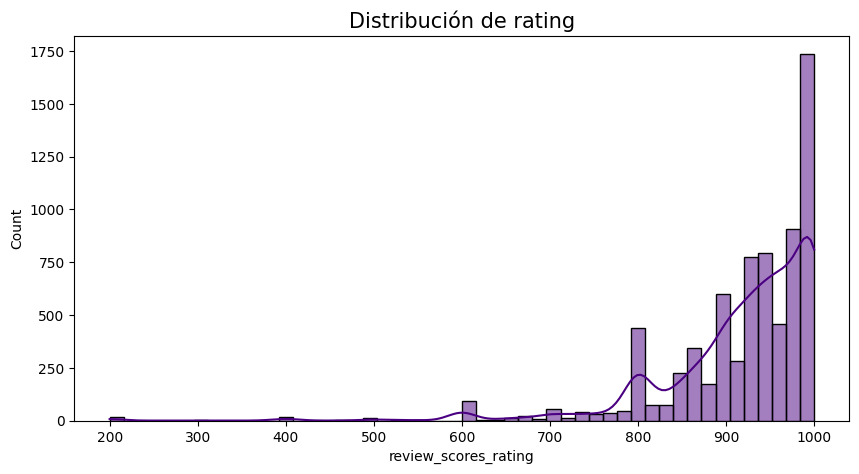

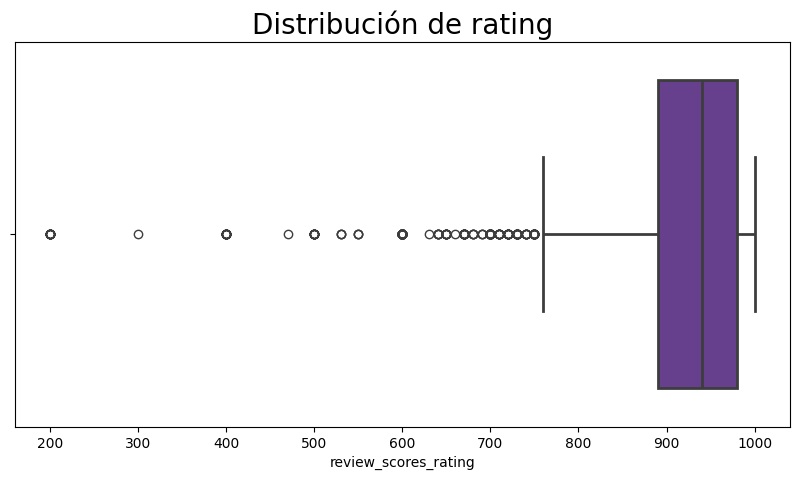

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df_with_reviews['review_scores_rating'], bins=50, kde=True, color='indigo')
plt.title('Distribución de rating', fontsize=15)


fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_rating', color='rebeccapurple', linewidth=2)
plt.title('Distribución de rating', fontsize=20)

plt.show();

### Accuracy

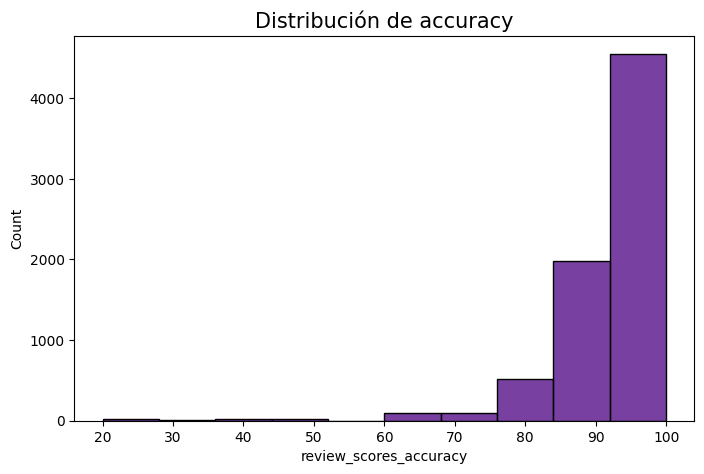

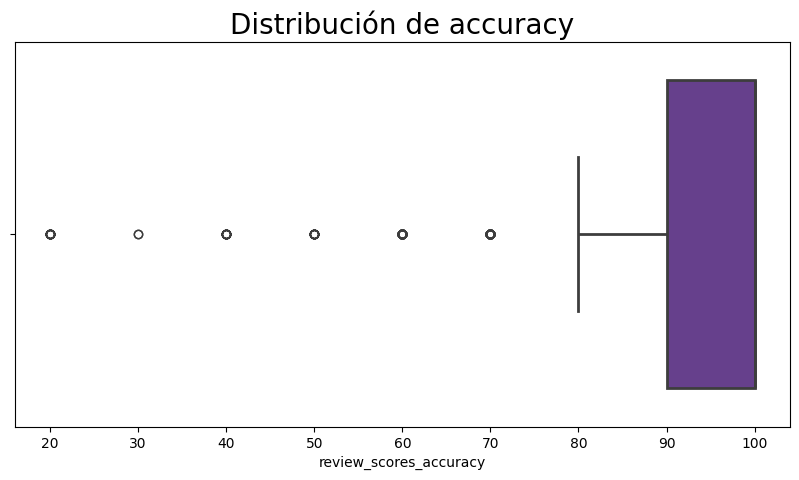

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_accuracy'], bins=10, color='indigo')
plt.title('Distribución de accuracy', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_accuracy', color='rebeccapurple', linewidth=2)
plt.title('Distribución de accuracy', fontsize=20)

plt.show();

### Cleanliness

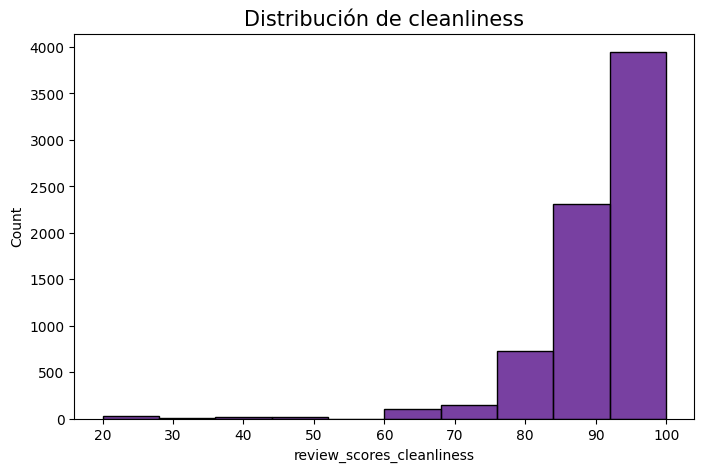

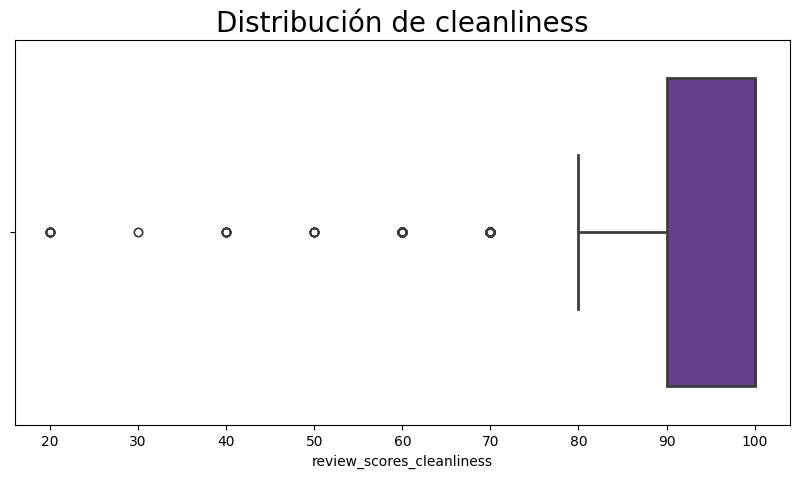

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_cleanliness'], bins=10, color='indigo')
plt.title('Distribución de cleanliness', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_cleanliness', color='rebeccapurple', linewidth=2)
plt.title('Distribución de cleanliness', fontsize=20)

plt.show();

### Checkin

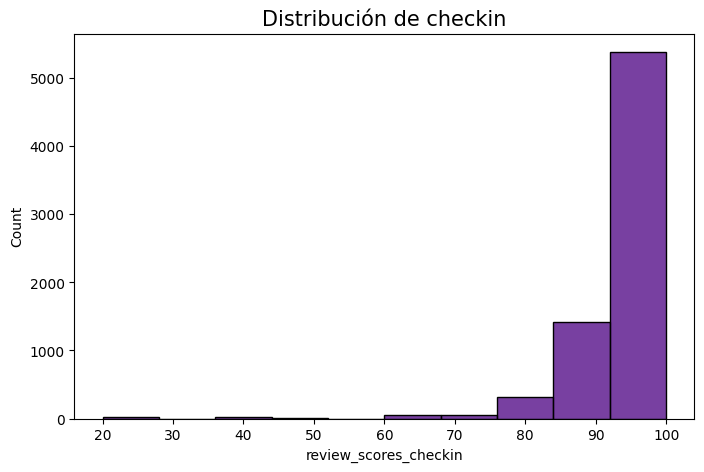

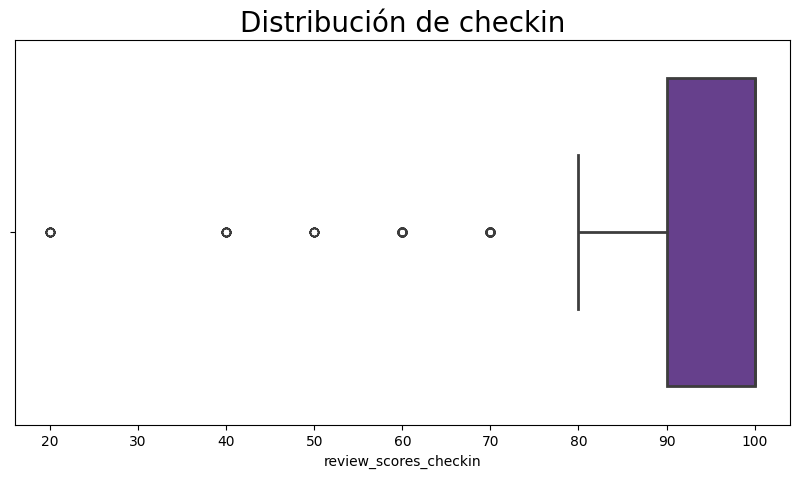

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_checkin'], bins=10, color='indigo')
plt.title('Distribución de checkin', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_checkin', color='rebeccapurple', linewidth=2)
plt.title('Distribución de checkin', fontsize=20)

plt.show();

### Communication

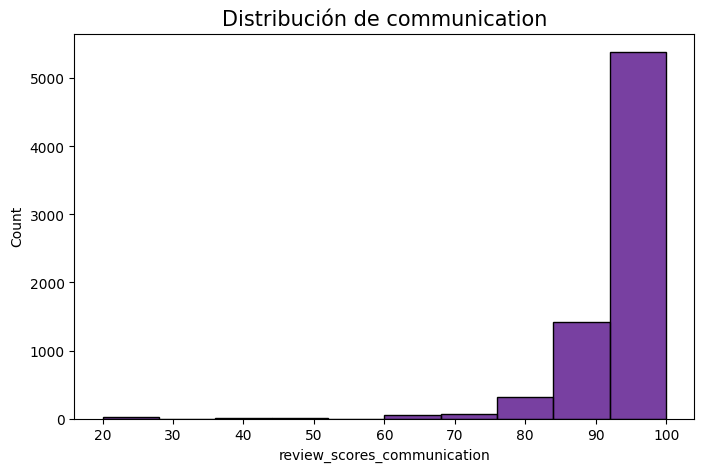

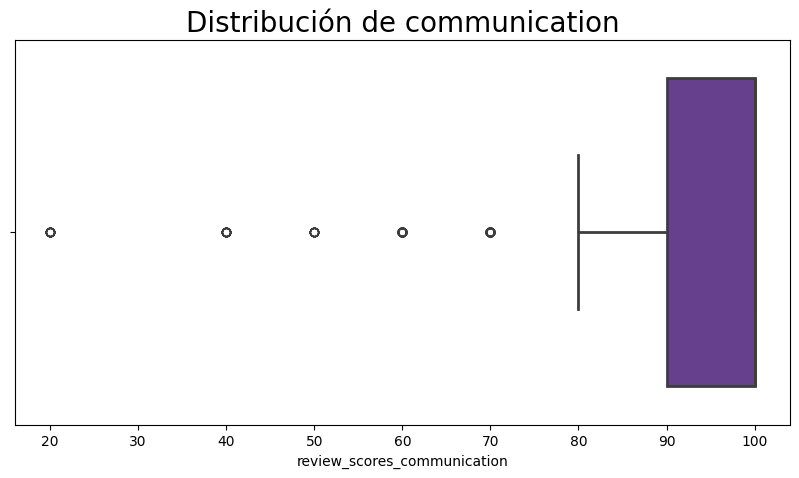

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_communication'], bins=10, color='indigo')
plt.title('Distribución de communication', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_communication', color='rebeccapurple', linewidth=2)
plt.title('Distribución de communication', fontsize=20)

plt.show();

### Location

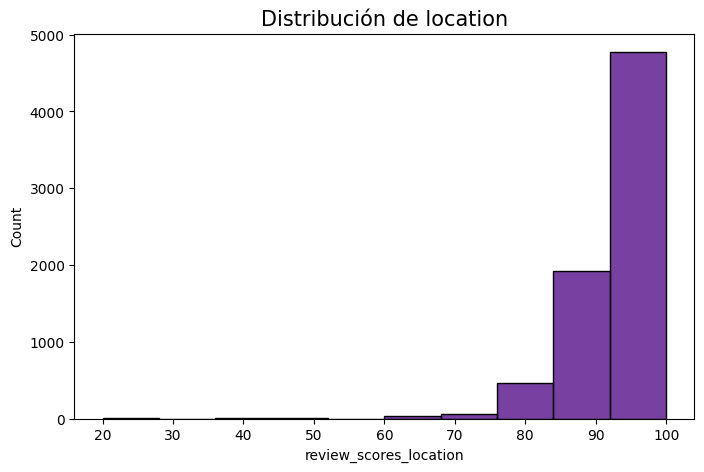

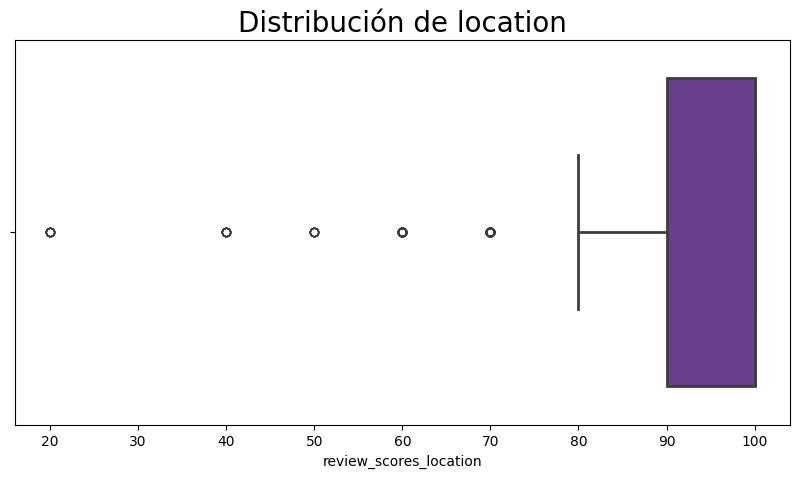

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_location'], bins=10, color='indigo')
plt.title('Distribución de location', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_location', color='rebeccapurple', linewidth=2)
plt.title('Distribución de location', fontsize=20)

plt.show();

### Value

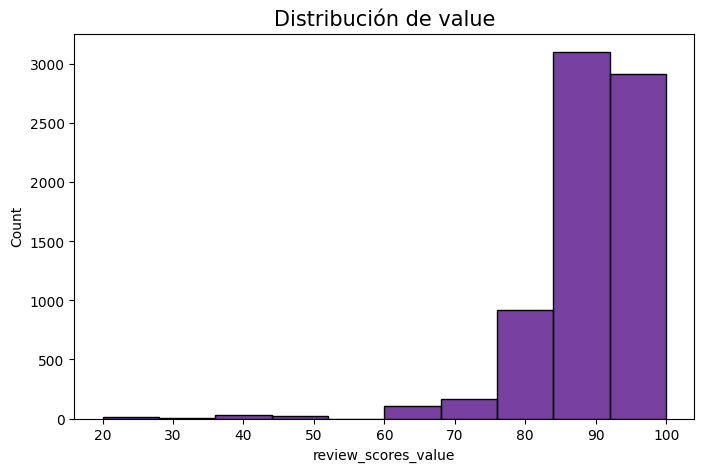

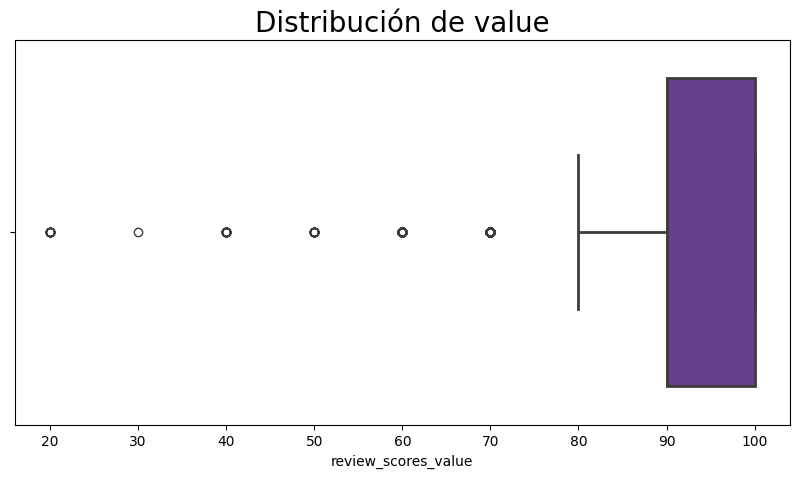

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_value'], bins=10, color='indigo')
plt.title('Distribución de value', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_value', color='rebeccapurple', linewidth=2)
plt.title('Distribución de value', fontsize=20)

plt.show();

### Relaciones entre variables

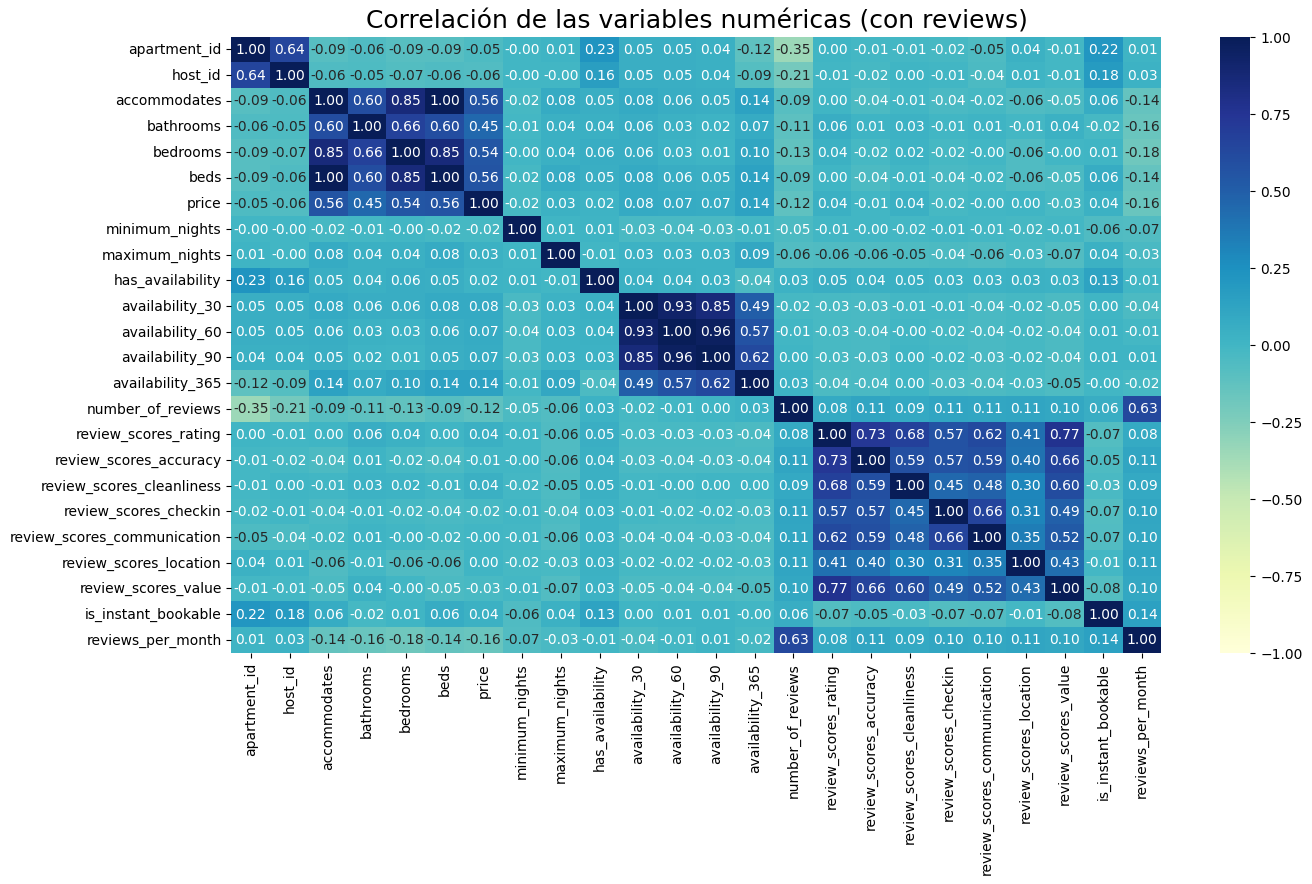

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_with_reviews.corr(numeric_only=True), vmin= -1, vmax=1, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlación de las variables numéricas (con reviews)', fontsize=18)
plt.show();

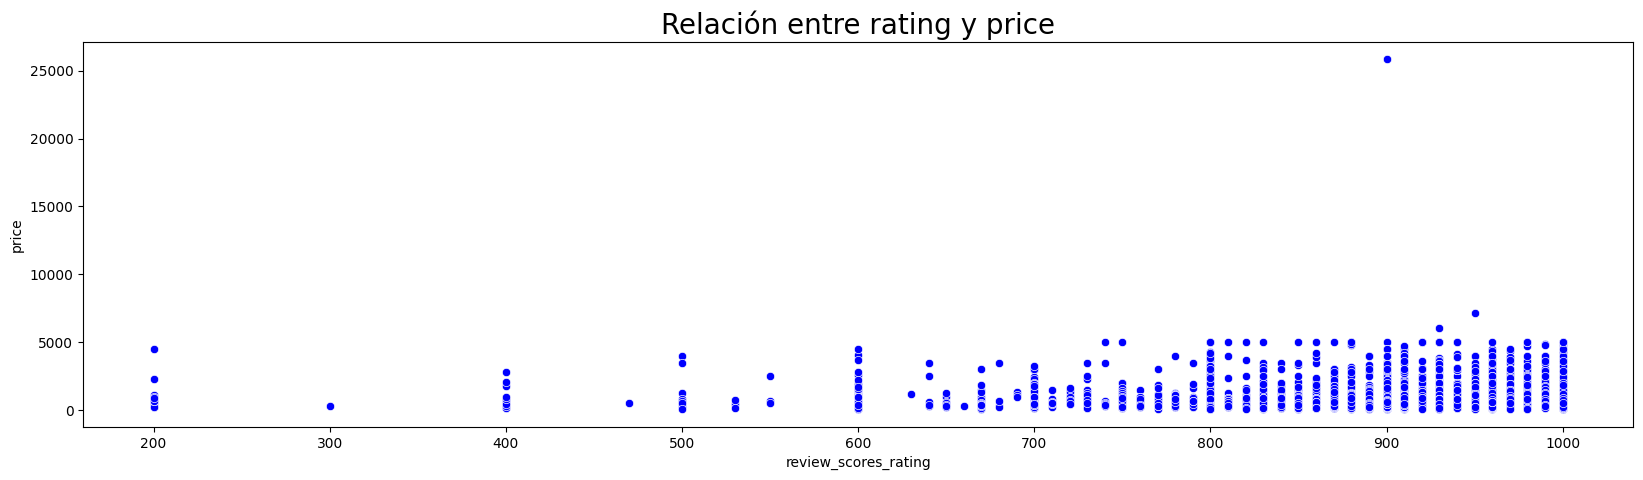

In [23]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df_with_reviews, x='review_scores_rating', y='price', color='blue')

plt.title('Relación entre rating y price', fontsize=20)
plt.show();

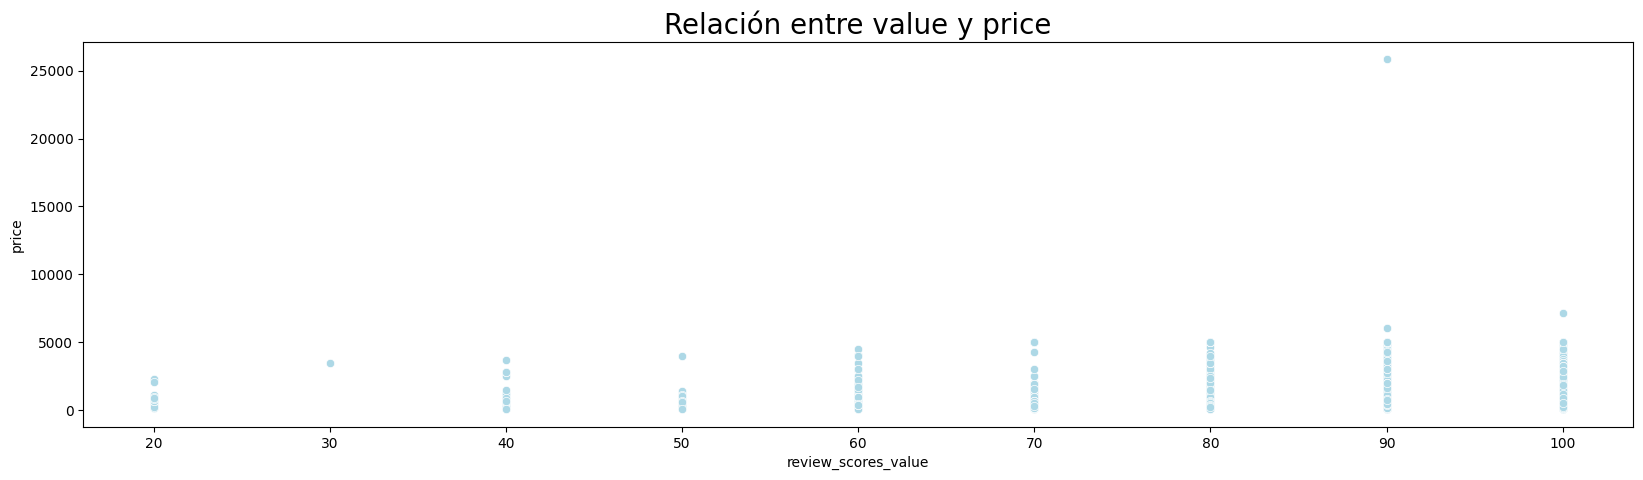

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df_with_reviews, x='review_scores_value', y='price', color='lightblue')

plt.title('Relación entre value y price', fontsize=20)
plt.show();

## KPIs de CX - en PowerBI

### 3. Índice de satisfacción general

### 4. Item con más satisfacción media

## Preguntas de negocio

### Calificación media de los alojamientos

In [25]:
avg_rating = df_with_reviews['review_scores_rating'].mean().round(2)
print(f'Calificación media de los alojamientos: {avg_rating}/1000')

Calificación media de los alojamientos: 919.3/1000


### Porcentaje de alojamientos con calificación sobre 80 por ciudad

In [26]:
# ciudad_agrupada = df_with_reviews.groupby("city")["review_scores_rating"]
# porcentaje_mayor_800 = (ciudad_agrupada.apply(lambda x: (x > 800).mean()) * 100).round().reset_index()

# porcentaje_mayor_800


## Comparación entre anuncios con y sin review

## Desafío 2
¿Qué aspectos (precisión de detalles, higiene, check-in o comunicación) presentan diferencias más grandes entre los alojamientos mejor y peor valorados en la evaluación general?

In [ ]:
# Cálculo de cuartiles para 'review_scores_rating'
Q1 = df_with_reviews['review_scores_rating'].quantile(0.25)
Q3 = df_with_reviews['review_scores_rating'].quantile(0.75)

# Los "peores" serán los valores <= Q1 y los "mejores" los valores >= Q3
peores = df_with_reviews[df_with_reviews['review_scores_rating'] <= Q1]
mejores = df_with_reviews[df_with_reviews['review_scores_rating'] >= Q3]

print(f'Q1 (25%): {Q1}')
print(f'Q3 (75%): {Q3}')
print(f'Número de peores (según cuartiles): {len(peores)}')
print(f'Número de mejores (según cuartiles): {len(mejores)}')

Q1 (25%): 890.0
Q3 (75%): 980.0
Número de peores (según cuartiles): 1909
Número de mejores (según cuartiles): 2182


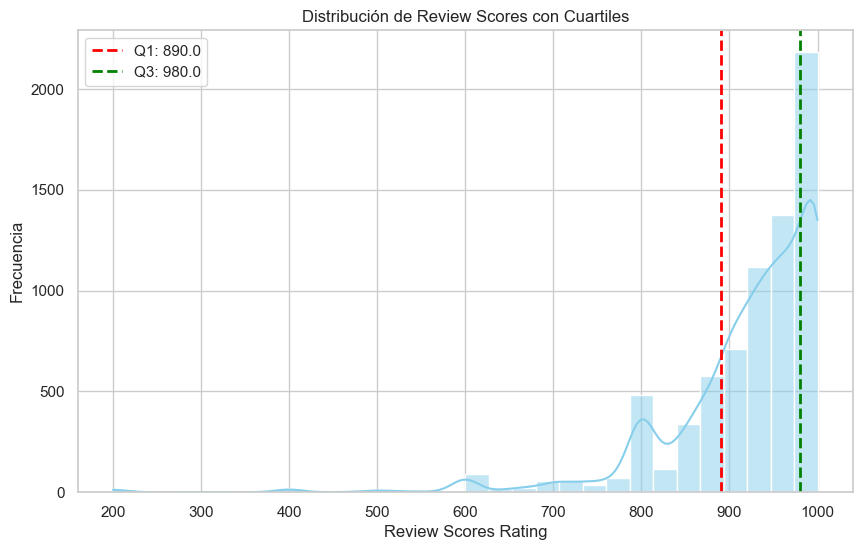

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_with_reviews['review_scores_rating'], bins=30, kde=True, color='skyblue')

# líneas para Q1 y Q3
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label=f'Q1: {Q1}')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=2, label=f'Q3: {Q3}')

plt.xlabel('Review Scores Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Review Scores con Cuartiles')
plt.legend()

plt.show()

In [30]:
# Filtrar los alojamientos peor valorados
peores = df_with_reviews[df_with_reviews['review_scores_rating'] <= Q1]

peores[['apartment_id', 'name', 'review_scores_rating']].head()

,apartment_id,name,review_scores_rating
6,58512,Stylish & cozy 3BR near Sagrada Familia,890.0
10,73692,Rustic apartment : Rambla Catalunya (HUTB-005863),840.0
12,89756,"Old town 1, 6minutesfrom Ramblas",890.0
19,121210,"BIG ROOM IN CITY CENTER,NEAR BEACH!",890.0
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,870.0


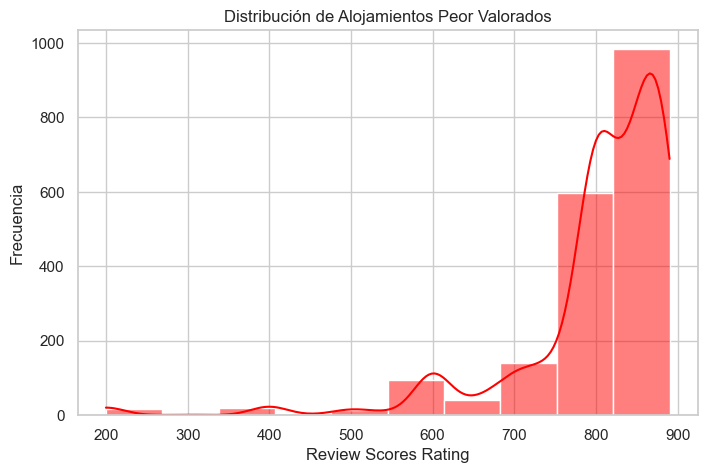

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(peores['review_scores_rating'], bins=10, kde=True, color='red')

plt.xlabel('Review Scores Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alojamientos Peor Valorados')
plt.show()

In [34]:
max_rating = df_with_reviews[df_with_reviews['review_scores_rating'] == df_with_reviews['review_scores_rating'].max()]

print("Registro con el máximo review_scores_rating:")
max_rating

Registro con el máximo review_scores_rating:


,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
79,461943,Lovely DoubleRoom Barcelona Center,2293257,la Nova Esquerra de l'Eixample,Eixample,Private room,2,1.0,1.0,2,"Internet,Wireless Internet,Elevator in buildin...",490.0,3,30,False,19,49,79,79,1,2017-05-06,2017-05-06,1000.0,100.0,100.0,60.0,100.0,80.0,80.0,True,10.0,barcelona,2017-06-05
117,590991,Beautiful Cheap Double NEAR BEACH!!,2584681,el Poblenou,Sant Mart�,Private room,2,2.0,1.0,2,"TV,Internet,Wifi,Kitchen,Smoking allowed,Pets ...",800.0,2,14,True,30,60,90,365,1,NaN,NaN,1000.0,80.0,80.0,100.0,100.0,100.0,80.0,False,2.0,barcelona,2018-04-12
134,640268,**Nice and relax Couple Room**,3196093,la Nova Esquerra de l'Eixample,Eixample,Private room,2,1.0,1.0,2,"TV,Wifi,Kitchen,Elevator",380.0,2,1125,True,8,38,68,343,4,NaN,NaN,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,False,6.0,barcelona,2018-07-10
157,717300,Mar Blau - 0114,3625030,Alc�dia,Desconocido,Entire home/apt,4,2.0,2.0,4,"TV,Pool,Kitchen,Family/kid friendly,Washer,Ess...",950.0,7,1125,False,13,40,53,132,1,NaN,NaN,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,11.0,mallorca,2017-03-15
173,751527,Gran apartamento Plaza de Espa�a,3951702,Universidad,Centro,Entire home/apt,9,3.0,4.0,9,"TV,Internet,Wireless Internet,Wheelchair acces...",1900.0,5,90,False,17,25,36,250,44,2013-12-04,2017-04-03,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,False,93.0,madrid,2017-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,46060050,Maravilloso apartamento en Chueca,372658950,Justicia,Centro,Entire home/apt,4,2.0,2.0,4,"TV, Air conditioning, Microwave, Shampoo, Long...",730.0,1,1125,True,0,0,25,137,3,NaN,NaN,1000.0,100.0,100.0,100.0,100.0,100.0,90.0,True,17.0,madrid,2021-02-09
9984,46615731,Habitacion econ�mica centrica plaza espa�a.,376852626,Hostafrancs,Sants-Montju�c,Private room,1,2.0,1.0,1,"Kitchen, Microwave, Hot water, Laundromat near...",210.0,1,5,True,8,28,58,333,1,2020-11-12,2020-11-12,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,10.0,barcelona,2020-12-16
9987,46749230,Habitaci�n Grande PLENO CENTRO a 1km de Playa+...,276500587,Centro,Desconocido,Private room,4,2.0,1.0,4,"Cooking basics, Oven, Long term stays allowed,...",170.0,1,365,True,0,0,0,0,2,NaN,NaN,1000.0,100.0,90.0,100.0,100.0,100.0,100.0,True,20.0,malaga,2021-01-31
9989,46984837,APARTAMENTO INDEPENDIENTE DE ESTILO SEVILLANO,240047311,Ciudad Jard�n,Nervi�n,Entire home/apt,4,2.0,1.0,4,"Dishwasher, Cooking basics, Wifi, Air conditio...",260.0,2,365,True,16,43,73,75,3,2021-10-01,2021-12-02,1000.0,100.0,90.0,100.0,100.0,100.0,100.0,False,176.0,sevilla,2021-02-27


In [35]:
min_rating = df_with_reviews[df_with_reviews['review_scores_rating'] == df_with_reviews['review_scores_rating'].min()]

print("\nRegistro con el mínimo review_scores_rating:")
min_rating


Registro con el mínimo review_scores_rating:


,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
734,3073348,"APARTAMENTOS AQUARIUM. 25 M2 TERRAZA, BARBACOA",14040896,Roses,Desconocido,Entire home/apt,4,1.0,1.0,4,"TV,Kitchen,Smoking allowed,Pets allowed,Free s...",520.0,3,30,True,26,48,78,325,1,NaN,NaN,200.0,NaN,100.0,20.0,80.0,NaN,40.0,False,2.0,girona,2018-11-26
1524,7262469,Habitaci�n doble en Poble Sec,38021841,Sant Antoni,Eixample,Private room,2,1.0,1.0,2,"TV,Cable TV,Internet,Wireless Internet,Air con...",380.0,1,1125,False,0,0,0,0,1,2015-01-09,2015-01-09,200.0,20.0,20.0,40.0,60.0,100.0,20.0,False,5.0,barcelona,2017-04-08
3813,17649686,Spacious and sunny apartment for 5/6 persons.,98454076,Llan��,Desconocido,Entire home/apt,6,1.0,3.0,6,"TV,Cable TV,Kitchen,Smoking allowed,Pets allow...",710.0,1,1125,True,7,7,7,7,1,NaN,NaN,200.0,NaN,20.0,NaN,NaN,NaN,NaN,True,7.0,girona,2018-10-20
4177,18536423,La Ginesta (LES150),113497406,L'Escala,Desconocido,Entire home/apt,5,1.0,2.0,5,"TV,Pool,Kitchen,Smoking allowed,Family/kid fri...",350.0,1,28,True,0,6,35,310,1,2018-11-08,2018-11-08,200.0,100.0,100.0,100.0,100.0,100.0,80.0,True,8.0,girona,2019-07-29
4517,19247709,CRISSON,134761428,L'Escala,Desconocido,Entire home/apt,6,2.0,3.0,6,"TV,Internet,Wifi,Kitchen,Smoking allowed,Pets ...",890.0,3,1125,True,28,58,88,92,1,2018-01-04,2018-01-04,200.0,20.0,20.0,100.0,100.0,100.0,20.0,True,16.0,girona,2018-09-28
4946,20438732,The flair of Ibiza on the coast � Casa Morr�s 45,142978193,Felanitx,Desconocido,Entire home/apt,5,2.0,2.0,5,"Internet,Wifi,Air conditioning,Free parking on...",370.0,1,1125,True,30,60,90,365,1,NaN,NaN,200.0,20.0,20.0,20.0,20.0,100.0,20.0,True,4.0,mallorca,2020-05-28
5232,21418557,Roomspace Sandoval- Glorieta de Bilbao 2,31772865,Trafalgar,Chamber�,Entire home/apt,2,1.0,1.0,2,Sin información,1150.0,3,1125,True,30,60,90,365,1,NaN,NaN,200.0,20.0,20.0,20.0,20.0,20.0,20.0,False,22.0,madrid,2018-05-14
5764,22995415,Barbieri City Center,54310958,Justicia,Centro,Entire home/apt,4,1.0,1.0,4,"TV,Wifi,Kitchen,Elevator,Heating,Family/kid fr...",970.0,2,1125,True,16,42,66,148,1,NaN,NaN,200.0,20.0,20.0,40.0,20.0,100.0,20.0,True,10.0,madrid,2018-04-12
6729,26125080,Finca Ses Colonies,196373641,Ses Salines,Desconocido,Private room,12,7.0,6.0,12,"TV,Wifi,Air conditioning,Pool,Kitchen,Free par...",4500.0,2,30,True,29,59,89,364,1,2018-05-08,2018-05-08,200.0,20.0,40.0,60.0,20.0,80.0,60.0,True,41.0,mallorca,2018-10-17
7083,27603327,Apartment In Lloret De Mar Fenals,23730135,Lloret de Mar,Desconocido,Entire home/apt,4,1.0,1.0,4,"TV,Cable TV,Wifi,Pool,Kitchen,Smoking allowed,...",790.0,4,1125,True,17,19,29,29,1,2018-12-08,2018-12-08,200.0,60.0,20.0,60.0,60.0,80.0,20.0,True,10.0,girona,2018-08-30


In [36]:
max_value = df_with_reviews['review_scores_rating'].max()
min_value = df_with_reviews['review_scores_rating'].min()

print(f'Valor máximo de review_scores_rating: {max_value}')
print(f'Valor mínimo de review_scores_rating: {min_value}')

Valor máximo de review_scores_rating: 1000.0
Valor mínimo de review_scores_rating: 200.0


## Promedio del máximo rating 

In [39]:
# Obtener los registros donde review_scores_rating es igual al máximo valor
max_reviews = df_with_reviews[df_with_reviews['review_scores_rating'] == max_value]

# Seleccionar las columnas numéricas a promediar
columnas_a_promediar = [
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

# Calcular el promedio de estas columnas en los registros con el máximo valor
promedio_max_reviews = max_reviews[columnas_a_promediar].mean().round(2)

print("Promedio de las columnas para los registros con el máximo review_scores_rating:")
print(promedio_max_reviews)


Promedio de las columnas para los registros con el máximo review_scores_rating:
number_of_reviews                 5.16
review_scores_rating           1000.00
review_scores_accuracy           98.54
review_scores_cleanliness        97.70
review_scores_checkin            98.64
review_scores_communication      98.89
review_scores_location           97.50
review_scores_value              96.90
reviews_per_month                43.66
dtype: float64


## Promedio de los registros con el mínimo rating 

In [ ]:
# Obtener los registros donde review_scores_rating es igual al máximo valor
min_reviews = df_with_reviews[df_with_reviews['review_scores_rating'] == min_value]

# Seleccionar las columnas numéricas a promediar
columnas_a_promediar = [
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

# Calcular el promedio de estas columnas en los registros con el máximo valor
promedio_min_reviews = min_reviews[columnas_a_promediar].mean()

# Mostrar resultados
print("Promedio de las columnas para los registros con el máximo review_scores_rating:")
print(promedio_min_reviews)

## Comparativo 

In [40]:
# Obtener el valor mínimo de review_scores_rating
min_value = df_with_reviews['review_scores_rating'].min()

# Filtrar los registros con el valor máximo y mínimo
max_reviews = df_with_reviews[df_with_reviews['review_scores_rating'] == max_value]
min_reviews = df_with_reviews[df_with_reviews['review_scores_rating'] == min_value]

# Seleccionar las columnas numéricas a comparar
columnas_a_comparar = [
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

# Calcular el promedio de estas columnas para los registros con el valor máximo
promedio_max_reviews = max_reviews[columnas_a_comparar].mean()

# Calcular el promedio de estas columnas para los registros con el valor mínimo
promedio_min_reviews = min_reviews[columnas_a_comparar].mean()

# Calcular la diferencia (max - min)
diferencia = promedio_max_reviews - promedio_min_reviews

# Crear un DataFrame con la comparación
comparacion = pd.DataFrame({
    'Promedio Máximo Review': promedio_max_reviews,
    'Promedio Mínimo Review': promedio_min_reviews,
    'Diferencia (Max - Min)': diferencia
})

# Mostrar resultados
print("Comparación entre los registros con máximo y mínimo review_scores_rating:")
print(comparacion)

Comparación entre los registros con máximo y mínimo review_scores_rating:
                             Promedio Máximo Review  Promedio Mínimo Review  \
number_of_reviews                          5.161377                1.000000   
review_scores_rating                    1000.000000              200.000000   
review_scores_accuracy                    98.540541               30.666667   
review_scores_cleanliness                 97.695946               32.941176   
review_scores_checkin                     98.635438               53.750000   
review_scores_communication               98.891892               51.250000   
review_scores_location                    97.501697               69.333333   
review_scores_value                       96.902174               32.500000   
reviews_per_month                         43.663065               11.647059   

                             Diferencia (Max - Min)  
number_of_reviews                          4.161377  
review_scores_rating       

#### Diferencia entre promedio máximo y mínimo

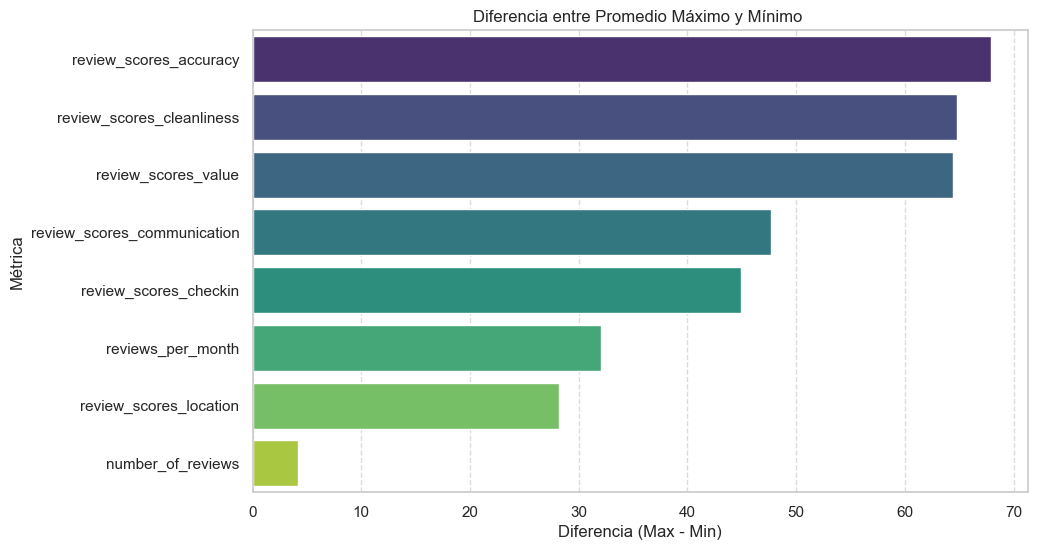

In [42]:
# Eliminar 'review_scores_rating' de las columnas a comparar
columnas_a_comparar_sin_rating = [col for col in columnas_a_comparar if col != 'review_scores_rating']

# Recalcular los promedios sin 'review_scores_rating'
promedio_max_reviews_sin_rating = max_reviews[columnas_a_comparar_sin_rating].mean()
promedio_min_reviews_sin_rating = min_reviews[columnas_a_comparar_sin_rating].mean()

# Calcular la diferencia (max - min) sin 'review_scores_rating'
diferencia_sin_rating = promedio_max_reviews_sin_rating - promedio_min_reviews_sin_rating

# Crear un DataFrame con la diferencia sin 'review_scores_rating'
comparacion_sin_rating = pd.DataFrame({
    'Diferencia (Max - Min)': diferencia_sin_rating
})

# Ordenar las diferencias de mayor a menor
diferencia_ordenada_sin_rating = comparacion_sin_rating['Diferencia (Max - Min)'].sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=diferencia_ordenada_sin_rating.values, y=diferencia_ordenada_sin_rating.index, hue=diferencia_ordenada_sin_rating.index, palette='viridis', legend=False)

plt.xlabel('Diferencia (Max - Min)')
plt.ylabel('Métrica')
plt.title('Diferencia entre Promedio Máximo y Mínimo ')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()